In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
from stock_American_new import GBM_stock, Binomial_stock
from tqdm import trange
from utils_american import episodes_50_gbm_american, episodes_50_american
import random
import matplotlib.pyplot as plt
from ddpg import ddpgAgent

In [2]:
## binomial first
eposide = 20000
random.seed(24)

ddpg_agent = ddpgAgent(alpha=0.0003, beta=0.0003, input_dim=[2], tau=0.001)

best_test_50 = -100

test_scores_ddpg = []
for i in trange(eposide):

    env = Binomial_stock(S0=50,  K=50, rf=0.05, sigma=0.3, n_step=80)
    done = False
    already_strike = False
    score = 0
    state = env.reset()
    while not done:
        action = ddpg_agent.choose_action(state)
        next_state, reward, done, already_strike = env.step(action, state, already_strike)
        ddpg_agent.remember(state, action, reward, next_state, int(done))
        ddpg_agent.learn()
        score += reward
        state = next_state

    # score_history.append(score)
    if (i+1) % 100 == 0:
        test_50 = episodes_50_american(ddpg_agent, S=50, K=50, r=0.05, sigma=0.3, n_step=80)
        print('episode ', i, 'score %.2f' % score,
              '50 test average score %.2f' % test_50)

        if test_50 > best_test_50:
            best_test_50 = test_50
            ddpg_agent.save_models()

        test_scores_ddpg.append(test_50)
        if abs(test_50) < 0.1:
            print('Finish training early')
            break

  0%|                                                 | 0/20000 [00:00<?, ?it/s]/Users/faroldfry/Desktop/Term2/MAFS5370/Ass2/rl_assignment2 3/ddpg.py:204: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1678454847243/work/torch/csrc/utils/tensor_new.cpp:248.)
  action = torch.tensor(action, dtype=torch.float).to(self.critic.device)
  0%|▏                                    | 100/20000 [00:45<3:16:46,  1.69it/s]

exercise early average at time 55.0 early exercise ratio is 0.6
episode  99 score -10.63 50 test average score -9.19
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  1%|▎                                    | 200/20000 [01:31<3:17:38,  1.67it/s]

exercise early average at time 47.21875 early exercise ratio is 0.64
episode  199 score -3.00 50 test average score -6.31
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  2%|▌                                    | 300/20000 [02:17<3:16:01,  1.67it/s]

exercise early average at time 54.73076923076923 early exercise ratio is 0.52
episode  299 score -4.52 50 test average score -6.12
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  2%|▋                                    | 400/20000 [03:02<3:16:31,  1.66it/s]

exercise early average at time 54.77272727272727 early exercise ratio is 0.44
episode  399 score -13.68 50 test average score -5.26
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  2%|▉                                    | 500/20000 [03:48<3:14:15,  1.67it/s]

exercise early average at time 51.96666666666667 early exercise ratio is 0.6
episode  499 score -3.92 50 test average score -4.48
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  3%|█                                    | 600/20000 [04:35<3:14:23,  1.66it/s]

exercise early average at time 48.629629629629626 early exercise ratio is 0.54
episode  599 score -10.46 50 test average score -3.75
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  4%|█▎                                   | 700/20000 [05:22<3:12:46,  1.67it/s]

exercise early average at time 46.47826086956522 early exercise ratio is 0.46
episode  699 score -23.18 50 test average score -5.78


  4%|█▍                                   | 800/20000 [06:08<3:12:57,  1.66it/s]

exercise early average at time 45.07692307692308 early exercise ratio is 0.52
episode  799 score -4.41 50 test average score -5.07


  4%|█▋                                   | 900/20000 [06:55<3:13:11,  1.65it/s]

exercise early average at time 46.2962962962963 early exercise ratio is 0.54
episode  899 score -16.45 50 test average score -4.86


  5%|█▊                                  | 1000/20000 [07:40<3:05:11,  1.71it/s]

exercise early average at time 54.875 early exercise ratio is 0.48
episode  999 score -14.19 50 test average score -4.19


  6%|█▉                                  | 1100/20000 [08:25<3:10:47,  1.65it/s]

exercise early average at time 44.25 early exercise ratio is 0.4
episode  1099 score -17.43 50 test average score -6.11


  6%|██▏                                 | 1200/20000 [09:10<3:05:51,  1.69it/s]

exercise early average at time 45.916666666666664 early exercise ratio is 0.48
episode  1199 score -2.78 50 test average score -3.26
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


  6%|██▎                                 | 1300/20000 [09:56<3:12:27,  1.62it/s]

exercise early average at time 46.84 early exercise ratio is 0.5
episode  1299 score -15.50 50 test average score -4.08


  7%|██▌                                 | 1400/20000 [10:42<3:09:42,  1.63it/s]

exercise early average at time 50.32142857142857 early exercise ratio is 0.56
episode  1399 score -3.88 50 test average score -4.33


  8%|██▋                                 | 1500/20000 [11:28<3:05:12,  1.66it/s]

exercise early average at time 58.083333333333336 early exercise ratio is 0.48
episode  1499 score -13.97 50 test average score -4.94


  8%|██▉                                 | 1600/20000 [12:14<3:13:33,  1.58it/s]

exercise early average at time 51.36 early exercise ratio is 0.5
episode  1599 score -11.01 50 test average score -6.12


  8%|███                                 | 1700/20000 [13:00<2:59:50,  1.70it/s]

exercise early average at time 44.03703703703704 early exercise ratio is 0.54
episode  1699 score -15.11 50 test average score -5.08


  9%|███▏                                | 1800/20000 [13:45<3:00:34,  1.68it/s]

exercise early average at time 44.84 early exercise ratio is 0.5
episode  1799 score -5.40 50 test average score -4.70


 10%|███▍                                | 1900/20000 [14:32<3:06:46,  1.62it/s]

exercise early average at time 47.583333333333336 early exercise ratio is 0.48
episode  1899 score -5.14 50 test average score -3.86


 10%|███▌                                | 2000/20000 [15:18<3:07:07,  1.60it/s]

exercise early average at time 56.92 early exercise ratio is 0.5
episode  1999 score -8.43 50 test average score -3.69


 10%|███▊                                | 2100/20000 [16:04<2:56:49,  1.69it/s]

exercise early average at time 54.92857142857143 early exercise ratio is 0.56
episode  2099 score -9.26 50 test average score -4.18


 11%|███▉                                | 2200/20000 [16:50<2:58:34,  1.66it/s]

exercise early average at time 49.19230769230769 early exercise ratio is 0.52
episode  2199 score -20.04 50 test average score -4.21


 12%|████▏                               | 2300/20000 [17:37<2:57:32,  1.66it/s]

exercise early average at time 53.80769230769231 early exercise ratio is 0.52
episode  2299 score -3.71 50 test average score -3.45


 12%|████▎                               | 2400/20000 [18:22<2:57:34,  1.65it/s]

exercise early average at time 41.75 early exercise ratio is 0.56
episode  2399 score -11.23 50 test average score -5.66


 12%|████▌                               | 2500/20000 [19:08<2:54:17,  1.67it/s]

exercise early average at time 46.5 early exercise ratio is 0.48
episode  2499 score -13.69 50 test average score -2.91
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 13%|████▋                               | 2600/20000 [19:54<2:51:25,  1.69it/s]

exercise early average at time 45.333333333333336 early exercise ratio is 0.54
episode  2599 score -13.40 50 test average score -4.58


 14%|████▊                               | 2700/20000 [20:40<2:50:50,  1.69it/s]

exercise early average at time 47.15384615384615 early exercise ratio is 0.52
episode  2699 score -10.39 50 test average score -3.42


 14%|█████                               | 2800/20000 [21:26<2:50:23,  1.68it/s]

exercise early average at time 50.38709677419355 early exercise ratio is 0.62
episode  2799 score -4.03 50 test average score -5.31


 14%|█████▏                              | 2900/20000 [22:12<2:48:31,  1.69it/s]

exercise early average at time 52.476190476190474 early exercise ratio is 0.42
episode  2899 score -22.70 50 test average score -5.10


 15%|█████▍                              | 3000/20000 [22:58<2:48:15,  1.68it/s]

exercise early average at time 51.642857142857146 early exercise ratio is 0.56
episode  2999 score -4.82 50 test average score -3.45


 16%|█████▌                              | 3100/20000 [23:44<2:48:43,  1.67it/s]

exercise early average at time 40.541666666666664 early exercise ratio is 0.48
episode  3099 score -7.77 50 test average score -2.97


 16%|█████▊                              | 3200/20000 [24:30<2:56:04,  1.59it/s]

exercise early average at time 41.733333333333334 early exercise ratio is 0.6
episode  3199 score -17.45 50 test average score -5.32


 16%|█████▉                              | 3300/20000 [25:16<2:46:01,  1.68it/s]

exercise early average at time 49.23809523809524 early exercise ratio is 0.42
episode  3299 score -5.18 50 test average score -3.39


 17%|██████                              | 3400/20000 [26:03<2:58:00,  1.55it/s]

exercise early average at time 42.19230769230769 early exercise ratio is 0.52
episode  3399 score -12.80 50 test average score -3.84


 18%|██████▎                             | 3500/20000 [26:49<2:43:57,  1.68it/s]

exercise early average at time 45.12 early exercise ratio is 0.5
episode  3499 score -2.83 50 test average score -2.99


 18%|██████▍                             | 3600/20000 [27:35<2:45:25,  1.65it/s]

exercise early average at time 46.166666666666664 early exercise ratio is 0.48
episode  3599 score -6.75 50 test average score -3.14


 18%|██████▋                             | 3700/20000 [28:21<2:41:08,  1.69it/s]

exercise early average at time 52.074074074074076 early exercise ratio is 0.54
episode  3699 score -14.92 50 test average score -5.60


 19%|██████▊                             | 3800/20000 [29:07<2:57:11,  1.52it/s]

exercise early average at time 39.148148148148145 early exercise ratio is 0.54
episode  3799 score -13.84 50 test average score -3.13


 20%|███████                             | 3900/20000 [29:54<2:39:44,  1.68it/s]

exercise early average at time 52.36363636363637 early exercise ratio is 0.44
episode  3899 score -6.69 50 test average score -4.58


 20%|███████▏                            | 4000/20000 [30:40<2:39:18,  1.67it/s]

exercise early average at time 46.107142857142854 early exercise ratio is 0.56
episode  3999 score -9.80 50 test average score -3.00


 20%|███████▍                            | 4100/20000 [31:26<2:38:01,  1.68it/s]

exercise early average at time 52.333333333333336 early exercise ratio is 0.6
episode  4099 score -13.35 50 test average score -4.87


 21%|███████▌                            | 4200/20000 [32:12<2:40:05,  1.64it/s]

exercise early average at time 49.51851851851852 early exercise ratio is 0.54
episode  4199 score -11.14 50 test average score -4.39


 22%|███████▋                            | 4300/20000 [32:59<2:36:34,  1.67it/s]

exercise early average at time 49.64 early exercise ratio is 0.5
episode  4299 score -9.31 50 test average score -4.09


 22%|███████▉                            | 4400/20000 [33:46<2:38:26,  1.64it/s]

exercise early average at time 57.708333333333336 early exercise ratio is 0.48
episode  4399 score -8.96 50 test average score -2.89
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 22%|████████                            | 4500/20000 [34:32<2:33:55,  1.68it/s]

exercise early average at time 49.03333333333333 early exercise ratio is 0.6
episode  4499 score -5.80 50 test average score -3.90


 23%|████████▎                           | 4600/20000 [35:18<2:44:32,  1.56it/s]

exercise early average at time 53.407407407407405 early exercise ratio is 0.54
episode  4599 score -4.54 50 test average score -5.92


 24%|████████▍                           | 4700/20000 [36:04<2:33:02,  1.67it/s]

exercise early average at time 49.69230769230769 early exercise ratio is 0.52
episode  4699 score -5.37 50 test average score -4.74


 24%|████████▋                           | 4800/20000 [36:49<2:34:36,  1.64it/s]

exercise early average at time 44.81818181818182 early exercise ratio is 0.44
episode  4799 score -8.91 50 test average score -4.43


 24%|████████▊                           | 4900/20000 [37:36<2:30:12,  1.68it/s]

exercise early average at time 49.55555555555556 early exercise ratio is 0.54
episode  4899 score -12.72 50 test average score -3.61


 25%|█████████                           | 5000/20000 [38:23<2:31:54,  1.65it/s]

exercise early average at time 44.65384615384615 early exercise ratio is 0.52
episode  4999 score -15.50 50 test average score -3.82


 26%|█████████▏                          | 5100/20000 [39:09<2:28:16,  1.67it/s]

exercise early average at time 49.44 early exercise ratio is 0.5
episode  5099 score -21.30 50 test average score -2.84
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 26%|█████████▎                          | 5200/20000 [39:55<2:28:31,  1.66it/s]

exercise early average at time 43.629629629629626 early exercise ratio is 0.54
episode  5199 score -4.71 50 test average score -4.84


 26%|█████████▌                          | 5300/20000 [40:41<2:32:40,  1.60it/s]

exercise early average at time 47.148148148148145 early exercise ratio is 0.54
episode  5299 score -3.29 50 test average score -3.73


 27%|█████████▋                          | 5400/20000 [41:28<2:24:50,  1.68it/s]

exercise early average at time 54.592592592592595 early exercise ratio is 0.54
episode  5399 score -3.09 50 test average score -4.11


 28%|█████████▉                          | 5500/20000 [42:14<2:23:45,  1.68it/s]

exercise early average at time 50.095238095238095 early exercise ratio is 0.42
episode  5499 score -16.29 50 test average score -3.54


 28%|██████████                          | 5600/20000 [43:00<2:24:15,  1.66it/s]

exercise early average at time 56.4 early exercise ratio is 0.6
episode  5599 score -4.40 50 test average score -3.78


 28%|██████████▎                         | 5700/20000 [43:46<2:27:38,  1.61it/s]

exercise early average at time 49.0 early exercise ratio is 0.48
episode  5699 score -7.50 50 test average score -3.43


 29%|██████████▍                         | 5800/20000 [44:32<2:23:17,  1.65it/s]

exercise early average at time 49.3448275862069 early exercise ratio is 0.58
episode  5799 score -3.35 50 test average score -3.84


 30%|██████████▌                         | 5900/20000 [45:18<2:23:42,  1.64it/s]

exercise early average at time 43.388888888888886 early exercise ratio is 0.36
episode  5899 score -2.81 50 test average score -3.30


 30%|██████████▊                         | 6000/20000 [46:05<2:18:24,  1.69it/s]

exercise early average at time 52.3 early exercise ratio is 0.6
episode  5999 score -8.53 50 test average score -5.05


 30%|██████████▉                         | 6100/20000 [46:51<2:17:39,  1.68it/s]

exercise early average at time 52.06666666666667 early exercise ratio is 0.6
episode  6099 score -13.55 50 test average score -5.75


 31%|███████████▏                        | 6200/20000 [47:37<2:17:45,  1.67it/s]

exercise early average at time 48.59090909090909 early exercise ratio is 0.44
episode  6199 score -5.03 50 test average score -3.62


 32%|███████████▎                        | 6300/20000 [48:23<2:15:09,  1.69it/s]

exercise early average at time 48.74193548387097 early exercise ratio is 0.62
episode  6299 score -15.91 50 test average score -5.61


 32%|███████████▌                        | 6400/20000 [49:08<2:16:31,  1.66it/s]

exercise early average at time 52.416666666666664 early exercise ratio is 0.48
episode  6399 score -9.78 50 test average score -3.13


 32%|███████████▋                        | 6500/20000 [49:54<2:14:11,  1.68it/s]

exercise early average at time 49.785714285714285 early exercise ratio is 0.56
episode  6499 score -17.67 50 test average score -4.10


 33%|███████████▉                        | 6600/20000 [50:39<2:13:25,  1.67it/s]

exercise early average at time 47.5 early exercise ratio is 0.56
episode  6599 score -8.78 50 test average score -4.18


 34%|████████████                        | 6700/20000 [51:25<2:11:42,  1.68it/s]

exercise early average at time 53.130434782608695 early exercise ratio is 0.46
episode  6699 score -7.06 50 test average score -3.51


 34%|████████████▏                       | 6800/20000 [52:10<2:11:03,  1.68it/s]

exercise early average at time 48.28 early exercise ratio is 0.5
episode  6799 score -10.01 50 test average score -2.59
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 34%|████████████▍                       | 6900/20000 [52:56<2:14:00,  1.63it/s]

exercise early average at time 46.96774193548387 early exercise ratio is 0.62
episode  6899 score -12.67 50 test average score -4.29


 35%|████████████▌                       | 7000/20000 [53:42<2:08:53,  1.68it/s]

exercise early average at time 44.11538461538461 early exercise ratio is 0.52
episode  6999 score -7.89 50 test average score -4.04


 36%|████████████▊                       | 7100/20000 [54:28<2:09:43,  1.66it/s]

exercise early average at time 57.44 early exercise ratio is 0.5
episode  7099 score -1.25 50 test average score -3.21


 36%|████████████▉                       | 7200/20000 [55:13<2:07:17,  1.68it/s]

exercise early average at time 41.53846153846154 early exercise ratio is 0.52
episode  7199 score -8.22 50 test average score -2.78


 36%|█████████████▏                      | 7300/20000 [55:59<2:06:54,  1.67it/s]

exercise early average at time 52.92 early exercise ratio is 0.5
episode  7299 score -17.54 50 test average score -2.54
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 37%|█████████████▎                      | 7400/20000 [56:45<2:04:40,  1.68it/s]

exercise early average at time 59.0 early exercise ratio is 0.4
episode  7399 score -9.88 50 test average score -2.99


 38%|█████████████▌                      | 7500/20000 [57:30<2:04:38,  1.67it/s]

exercise early average at time 49.36363636363637 early exercise ratio is 0.44
episode  7499 score -13.20 50 test average score -2.91


 38%|█████████████▋                      | 7600/20000 [58:16<2:03:14,  1.68it/s]

exercise early average at time 49.142857142857146 early exercise ratio is 0.56
episode  7599 score -5.11 50 test average score -3.46


 38%|█████████████▊                      | 7700/20000 [59:02<2:01:54,  1.68it/s]

exercise early average at time 48.666666666666664 early exercise ratio is 0.54
episode  7699 score -25.88 50 test average score -2.51
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 39%|██████████████                      | 7800/20000 [59:48<2:04:53,  1.63it/s]

exercise early average at time 46.333333333333336 early exercise ratio is 0.48
episode  7799 score -3.21 50 test average score -3.56


 40%|█████████████▍                    | 7900/20000 [1:00:34<2:00:36,  1.67it/s]

exercise early average at time 54.851851851851855 early exercise ratio is 0.54
episode  7899 score -6.48 50 test average score -4.62


 40%|█████████████▌                    | 8000/20000 [1:01:20<2:04:35,  1.61it/s]

exercise early average at time 41.0 early exercise ratio is 0.42
episode  7999 score -20.28 50 test average score -2.56


 40%|█████████████▊                    | 8100/20000 [1:02:06<2:00:05,  1.65it/s]

exercise early average at time 45.03225806451613 early exercise ratio is 0.62
episode  8099 score -5.94 50 test average score -5.62


 41%|█████████████▉                    | 8200/20000 [1:02:52<1:56:56,  1.68it/s]

exercise early average at time 52.84375 early exercise ratio is 0.64
episode  8199 score -5.70 50 test average score -4.25


 42%|██████████████                    | 8300/20000 [1:03:38<1:56:48,  1.67it/s]

exercise early average at time 52.958333333333336 early exercise ratio is 0.48
episode  8299 score -14.32 50 test average score -3.11


 42%|██████████████▎                   | 8400/20000 [1:04:23<1:55:19,  1.68it/s]

exercise early average at time 52.130434782608695 early exercise ratio is 0.46
episode  8399 score -9.13 50 test average score -3.07


 42%|██████████████▍                   | 8500/20000 [1:05:09<1:54:35,  1.67it/s]

exercise early average at time 47.18181818181818 early exercise ratio is 0.66
episode  8499 score -3.65 50 test average score -3.78


 43%|██████████████▌                   | 8600/20000 [1:05:54<1:53:28,  1.67it/s]

exercise early average at time 46.84848484848485 early exercise ratio is 0.66
episode  8599 score -1.24 50 test average score -4.71


 44%|██████████████▊                   | 8700/20000 [1:06:40<1:52:47,  1.67it/s]

exercise early average at time 53.333333333333336 early exercise ratio is 0.48
episode  8699 score -20.89 50 test average score -3.76


 44%|██████████████▉                   | 8800/20000 [1:07:26<1:54:02,  1.64it/s]

exercise early average at time 51.44 early exercise ratio is 0.5
episode  8799 score -4.34 50 test average score -4.05


 44%|███████████████▏                  | 8900/20000 [1:08:12<1:51:30,  1.66it/s]

exercise early average at time 47.90909090909091 early exercise ratio is 0.66
episode  8899 score -14.05 50 test average score -5.62


 45%|███████████████▎                  | 9000/20000 [1:08:58<1:50:08,  1.66it/s]

exercise early average at time 45.083333333333336 early exercise ratio is 0.48
episode  8999 score -4.94 50 test average score -3.83


 46%|███████████████▍                  | 9100/20000 [1:09:45<1:49:52,  1.65it/s]

exercise early average at time 46.57692307692308 early exercise ratio is 0.52
episode  9099 score -21.94 50 test average score -3.48


 46%|███████████████▋                  | 9200/20000 [1:10:31<1:49:54,  1.64it/s]

exercise early average at time 43.47826086956522 early exercise ratio is 0.46
episode  9199 score -6.44 50 test average score -2.79


 46%|███████████████▊                  | 9300/20000 [1:11:17<1:47:22,  1.66it/s]

exercise early average at time 45.2 early exercise ratio is 0.6
episode  9299 score -10.33 50 test average score -3.45


 47%|███████████████▉                  | 9400/20000 [1:12:03<1:46:52,  1.65it/s]

exercise early average at time 45.57142857142857 early exercise ratio is 0.56
episode  9399 score -1.88 50 test average score -5.80


 48%|████████████████▏                 | 9500/20000 [1:12:49<1:46:17,  1.65it/s]

exercise early average at time 58.08695652173913 early exercise ratio is 0.46
episode  9499 score -11.91 50 test average score -2.93


 48%|████████████████▎                 | 9600/20000 [1:13:35<1:44:29,  1.66it/s]

exercise early average at time 45.904761904761905 early exercise ratio is 0.42
episode  9599 score -18.32 50 test average score -2.96


 48%|████████████████▍                 | 9700/20000 [1:14:20<1:42:27,  1.68it/s]

exercise early average at time 51.96296296296296 early exercise ratio is 0.54
episode  9699 score -29.22 50 test average score -2.66


 49%|████████████████▋                 | 9800/20000 [1:15:05<1:40:58,  1.68it/s]

exercise early average at time 53.69230769230769 early exercise ratio is 0.52
episode  9799 score -12.41 50 test average score -3.92


 50%|████████████████▊                 | 9900/20000 [1:15:51<1:41:30,  1.66it/s]

exercise early average at time 51.333333333333336 early exercise ratio is 0.48
episode  9899 score -2.12 50 test average score -3.45


 50%|████████████████▌                | 10000/20000 [1:16:37<1:40:53,  1.65it/s]

exercise early average at time 53.142857142857146 early exercise ratio is 0.56
episode  9999 score -12.92 50 test average score -3.83


 50%|████████████████▋                | 10100/20000 [1:17:24<1:40:07,  1.65it/s]

exercise early average at time 50.5 early exercise ratio is 0.36
episode  10099 score -8.40 50 test average score -3.48


 51%|████████████████▊                | 10200/20000 [1:18:09<1:38:12,  1.66it/s]

exercise early average at time 49.52173913043478 early exercise ratio is 0.46
episode  10199 score -17.99 50 test average score -5.72


 52%|████████████████▉                | 10300/20000 [1:18:55<1:40:35,  1.61it/s]

exercise early average at time 51.48275862068966 early exercise ratio is 0.58
episode  10299 score -31.93 50 test average score -4.82


 52%|█████████████████▏               | 10400/20000 [1:19:42<1:37:04,  1.65it/s]

exercise early average at time 46.714285714285715 early exercise ratio is 0.56
episode  10399 score -3.43 50 test average score -3.40


 52%|█████████████████▎               | 10500/20000 [1:20:28<1:35:38,  1.66it/s]

exercise early average at time 42.88461538461539 early exercise ratio is 0.52
episode  10499 score -5.83 50 test average score -3.06


 53%|█████████████████▍               | 10600/20000 [1:21:14<1:34:26,  1.66it/s]

exercise early average at time 51.857142857142854 early exercise ratio is 0.56
episode  10599 score -6.26 50 test average score -3.18


 54%|█████████████████▋               | 10700/20000 [1:22:01<1:33:10,  1.66it/s]

exercise early average at time 44.8 early exercise ratio is 0.5
episode  10699 score -15.31 50 test average score -3.47


 54%|█████████████████▊               | 10800/20000 [1:22:47<1:32:48,  1.65it/s]

exercise early average at time 46.56521739130435 early exercise ratio is 0.46
episode  10799 score -14.28 50 test average score -2.90


 55%|█████████████████▉               | 10900/20000 [1:23:33<1:31:40,  1.65it/s]

exercise early average at time 54.583333333333336 early exercise ratio is 0.48
episode  10899 score -11.09 50 test average score -3.59


 55%|██████████████████▏              | 11000/20000 [1:24:19<1:30:37,  1.66it/s]

exercise early average at time 47.80769230769231 early exercise ratio is 0.52
episode  10999 score -11.70 50 test average score -2.80


 56%|██████████████████▎              | 11100/20000 [1:25:06<1:29:59,  1.65it/s]

exercise early average at time 52.86206896551724 early exercise ratio is 0.58
episode  11099 score -15.42 50 test average score -3.47


 56%|██████████████████▍              | 11200/20000 [1:25:52<1:29:02,  1.65it/s]

exercise early average at time 49.0 early exercise ratio is 0.5
episode  11199 score -5.95 50 test average score -4.67


 56%|██████████████████▋              | 11300/20000 [1:26:38<1:28:00,  1.65it/s]

exercise early average at time 40.7 early exercise ratio is 0.4
episode  11299 score -6.44 50 test average score -3.38


 57%|██████████████████▊              | 11400/20000 [1:27:24<1:27:05,  1.65it/s]

exercise early average at time 45.125 early exercise ratio is 0.48
episode  11399 score -20.25 50 test average score -2.59


 57%|██████████████████▉              | 11500/20000 [1:28:10<1:25:55,  1.65it/s]

exercise early average at time 45.24 early exercise ratio is 0.5
episode  11499 score -3.43 50 test average score -2.83


 58%|███████████████████▏             | 11600/20000 [1:28:57<1:24:53,  1.65it/s]

exercise early average at time 48.625 early exercise ratio is 0.64
episode  11599 score -8.08 50 test average score -3.83


 58%|███████████████████▎             | 11700/20000 [1:29:43<1:23:33,  1.66it/s]

exercise early average at time 48.888888888888886 early exercise ratio is 0.36
episode  11699 score -14.88 50 test average score -2.59


 59%|███████████████████▍             | 11800/20000 [1:30:29<1:22:37,  1.65it/s]

exercise early average at time 46.111111111111114 early exercise ratio is 0.54
episode  11799 score -10.13 50 test average score -3.79


 60%|███████████████████▋             | 11900/20000 [1:31:15<1:21:30,  1.66it/s]

exercise early average at time 51.791666666666664 early exercise ratio is 0.48
episode  11899 score -1.27 50 test average score -3.39


 60%|███████████████████▊             | 12000/20000 [1:32:02<1:20:31,  1.66it/s]

exercise early average at time 49.689655172413794 early exercise ratio is 0.58
episode  11999 score -4.10 50 test average score -4.48


 60%|███████████████████▉             | 12100/20000 [1:32:48<1:20:06,  1.64it/s]

exercise early average at time 44.6 early exercise ratio is 0.5
episode  12099 score -5.13 50 test average score -3.14


 61%|████████████████████▏            | 12200/20000 [1:33:34<1:19:26,  1.64it/s]

exercise early average at time 45.5 early exercise ratio is 0.52
episode  12199 score -2.16 50 test average score -3.24


 62%|████████████████████▎            | 12300/20000 [1:34:20<1:17:38,  1.65it/s]

exercise early average at time 47.19230769230769 early exercise ratio is 0.52
episode  12299 score -6.95 50 test average score -3.33


 62%|████████████████████▍            | 12400/20000 [1:35:06<1:16:15,  1.66it/s]

exercise early average at time 52.666666666666664 early exercise ratio is 0.48
episode  12399 score -10.37 50 test average score -2.56


 62%|████████████████████▋            | 12500/20000 [1:35:53<1:15:23,  1.66it/s]

exercise early average at time 54.241379310344826 early exercise ratio is 0.58
episode  12499 score -6.66 50 test average score -3.03


 63%|████████████████████▊            | 12600/20000 [1:36:39<1:15:07,  1.64it/s]

exercise early average at time 51.2 early exercise ratio is 0.5
episode  12599 score -17.50 50 test average score -3.49


 64%|████████████████████▉            | 12700/20000 [1:37:25<1:12:59,  1.67it/s]

exercise early average at time 42.851851851851855 early exercise ratio is 0.54
episode  12699 score -4.45 50 test average score -3.24


 64%|█████████████████████            | 12800/20000 [1:38:11<1:12:59,  1.64it/s]

exercise early average at time 48.142857142857146 early exercise ratio is 0.42
episode  12799 score -8.49 50 test average score -4.12


 64%|█████████████████████▎           | 12900/20000 [1:38:58<1:11:47,  1.65it/s]

exercise early average at time 50.7 early exercise ratio is 0.6
episode  12899 score -9.21 50 test average score -4.54


 65%|█████████████████████▍           | 13000/20000 [1:39:44<1:10:49,  1.65it/s]

exercise early average at time 44.73913043478261 early exercise ratio is 0.46
episode  12999 score -5.01 50 test average score -3.58


 66%|█████████████████████▌           | 13100/20000 [1:40:30<1:10:07,  1.64it/s]

exercise early average at time 41.86666666666667 early exercise ratio is 0.6
episode  13099 score -4.08 50 test average score -3.96


 66%|█████████████████████▊           | 13200/20000 [1:41:16<1:08:32,  1.65it/s]

exercise early average at time 45.5 early exercise ratio is 0.56
episode  13199 score -4.50 50 test average score -4.43


 66%|█████████████████████▉           | 13300/20000 [1:42:02<1:07:44,  1.65it/s]

exercise early average at time 53.666666666666664 early exercise ratio is 0.54
episode  13299 score -6.55 50 test average score -4.31


 67%|██████████████████████           | 13400/20000 [1:42:49<1:06:27,  1.66it/s]

exercise early average at time 49.55172413793103 early exercise ratio is 0.58
episode  13399 score -5.49 50 test average score -2.88


 68%|██████████████████████▎          | 13500/20000 [1:43:35<1:05:06,  1.66it/s]

exercise early average at time 49.26923076923077 early exercise ratio is 0.52
episode  13499 score -5.84 50 test average score -3.54


 68%|██████████████████████▍          | 13600/20000 [1:44:21<1:04:44,  1.65it/s]

exercise early average at time 46.354838709677416 early exercise ratio is 0.62
episode  13599 score -10.26 50 test average score -3.47


 68%|██████████████████████▌          | 13700/20000 [1:45:07<1:03:37,  1.65it/s]

exercise early average at time 48.5 early exercise ratio is 0.52
episode  13699 score -4.80 50 test average score -3.09


 69%|██████████████████████▊          | 13800/20000 [1:45:54<1:02:55,  1.64it/s]

exercise early average at time 54.45 early exercise ratio is 0.4
episode  13799 score -12.56 50 test average score -3.20


 70%|██████████████████████▉          | 13900/20000 [1:46:40<1:01:50,  1.64it/s]

exercise early average at time 42.86363636363637 early exercise ratio is 0.44
episode  13899 score -7.06 50 test average score -2.84


 70%|███████████████████████          | 14000/20000 [1:47:26<1:00:49,  1.64it/s]

exercise early average at time 47.392857142857146 early exercise ratio is 0.56
episode  13999 score -2.71 50 test average score -3.37


 70%|████████████████████████▋          | 14100/20000 [1:48:12<59:25,  1.65it/s]

exercise early average at time 47.629629629629626 early exercise ratio is 0.54
episode  14099 score -7.75 50 test average score -2.97


 71%|████████████████████████▊          | 14200/20000 [1:48:59<58:02,  1.67it/s]

exercise early average at time 44.7037037037037 early exercise ratio is 0.54
episode  14199 score -13.69 50 test average score -3.25


 72%|█████████████████████████          | 14300/20000 [1:49:45<57:27,  1.65it/s]

exercise early average at time 50.53333333333333 early exercise ratio is 0.6
episode  14299 score -9.30 50 test average score -2.71


 72%|█████████████████████████▏         | 14400/20000 [1:50:31<56:24,  1.65it/s]

exercise early average at time 51.84615384615385 early exercise ratio is 0.52
episode  14399 score -23.37 50 test average score -4.09


 72%|█████████████████████████▍         | 14500/20000 [1:51:17<55:29,  1.65it/s]

exercise early average at time 44.61290322580645 early exercise ratio is 0.62
episode  14499 score -2.56 50 test average score -2.93


 73%|█████████████████████████▌         | 14600/20000 [1:52:03<54:29,  1.65it/s]

exercise early average at time 47.793103448275865 early exercise ratio is 0.58
episode  14599 score -10.86 50 test average score -3.41


 74%|█████████████████████████▋         | 14700/20000 [1:52:50<53:27,  1.65it/s]

exercise early average at time 55.42857142857143 early exercise ratio is 0.56
episode  14699 score -13.88 50 test average score -2.83


 74%|█████████████████████████▉         | 14800/20000 [1:53:36<52:49,  1.64it/s]

exercise early average at time 49.36666666666667 early exercise ratio is 0.6
episode  14799 score -3.33 50 test average score -3.16


 74%|██████████████████████████         | 14900/20000 [1:54:22<51:35,  1.65it/s]

exercise early average at time 54.833333333333336 early exercise ratio is 0.36
episode  14899 score -5.82 50 test average score -3.31


 75%|██████████████████████████▎        | 15000/20000 [1:55:08<50:06,  1.66it/s]

exercise early average at time 48.65217391304348 early exercise ratio is 0.46
episode  14999 score -17.39 50 test average score -3.01


 76%|██████████████████████████▍        | 15100/20000 [1:55:55<49:14,  1.66it/s]

exercise early average at time 45.588235294117645 early exercise ratio is 0.34
episode  15099 score -4.31 50 test average score -2.70


 76%|██████████████████████████▌        | 15200/20000 [1:56:41<48:30,  1.65it/s]

exercise early average at time 45.083333333333336 early exercise ratio is 0.48
episode  15199 score -20.42 50 test average score -2.90


 76%|██████████████████████████▊        | 15300/20000 [1:57:27<47:25,  1.65it/s]

exercise early average at time 56.53846153846154 early exercise ratio is 0.52
episode  15299 score -12.74 50 test average score -2.36
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 77%|██████████████████████████▉        | 15400/20000 [1:58:13<46:15,  1.66it/s]

exercise early average at time 53.535714285714285 early exercise ratio is 0.56
episode  15399 score -6.71 50 test average score -3.16


 78%|███████████████████████████▏       | 15500/20000 [1:58:59<44:57,  1.67it/s]

exercise early average at time 48.55172413793103 early exercise ratio is 0.58
episode  15499 score -7.66 50 test average score -3.59


 78%|███████████████████████████▎       | 15600/20000 [1:59:46<44:25,  1.65it/s]

exercise early average at time 47.916666666666664 early exercise ratio is 0.48
episode  15599 score -12.77 50 test average score -2.85


 78%|███████████████████████████▍       | 15700/20000 [2:00:32<43:16,  1.66it/s]

exercise early average at time 50.541666666666664 early exercise ratio is 0.48
episode  15699 score -34.05 50 test average score -3.50


 79%|███████████████████████████▋       | 15800/20000 [2:01:18<42:32,  1.65it/s]

exercise early average at time 51.8 early exercise ratio is 0.5
episode  15799 score -11.46 50 test average score -3.65


 80%|███████████████████████████▊       | 15900/20000 [2:02:04<41:20,  1.65it/s]

exercise early average at time 54.0 early exercise ratio is 0.5
episode  15899 score -4.82 50 test average score -2.22
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 80%|████████████████████████████       | 16000/20000 [2:02:50<40:14,  1.66it/s]

exercise early average at time 48.17857142857143 early exercise ratio is 0.56
episode  15999 score -6.75 50 test average score -3.20


 80%|████████████████████████████▏      | 16100/20000 [2:03:37<39:14,  1.66it/s]

exercise early average at time 54.26086956521739 early exercise ratio is 0.46
episode  16099 score -12.12 50 test average score -3.02


 81%|████████████████████████████▎      | 16200/20000 [2:04:23<38:13,  1.66it/s]

exercise early average at time 48.148148148148145 early exercise ratio is 0.54
episode  16199 score -9.87 50 test average score -2.68


 82%|████████████████████████████▌      | 16300/20000 [2:05:09<37:21,  1.65it/s]

exercise early average at time 48.76923076923077 early exercise ratio is 0.52
episode  16299 score -6.81 50 test average score -4.09


 82%|████████████████████████████▋      | 16400/20000 [2:05:55<36:33,  1.64it/s]

exercise early average at time 36.611111111111114 early exercise ratio is 0.36
episode  16399 score -18.10 50 test average score -3.40


 82%|████████████████████████████▉      | 16500/20000 [2:06:42<35:15,  1.65it/s]

exercise early average at time 46.666666666666664 early exercise ratio is 0.54
episode  16499 score -17.68 50 test average score -3.57


 83%|█████████████████████████████      | 16600/20000 [2:07:28<34:22,  1.65it/s]

exercise early average at time 48.904761904761905 early exercise ratio is 0.42
episode  16599 score -6.72 50 test average score -3.12


 84%|█████████████████████████████▏     | 16700/20000 [2:08:14<33:15,  1.65it/s]

exercise early average at time 47.72727272727273 early exercise ratio is 0.44
episode  16699 score -3.54 50 test average score -4.46


 84%|█████████████████████████████▍     | 16800/20000 [2:09:00<32:23,  1.65it/s]

exercise early average at time 43.32142857142857 early exercise ratio is 0.56
episode  16799 score -5.78 50 test average score -2.92


 84%|█████████████████████████████▌     | 16900/20000 [2:09:46<31:04,  1.66it/s]

exercise early average at time 49.73913043478261 early exercise ratio is 0.46
episode  16899 score -9.21 50 test average score -3.25


 85%|█████████████████████████████▊     | 17000/20000 [2:10:33<30:13,  1.65it/s]

exercise early average at time 56.3125 early exercise ratio is 0.64
episode  16999 score -7.71 50 test average score -3.54


 86%|█████████████████████████████▉     | 17100/20000 [2:11:19<29:13,  1.65it/s]

exercise early average at time 47.70967741935484 early exercise ratio is 0.62
episode  17099 score -15.26 50 test average score -4.85


 86%|██████████████████████████████     | 17200/20000 [2:12:05<28:10,  1.66it/s]

exercise early average at time 49.64 early exercise ratio is 0.5
episode  17199 score -5.47 50 test average score -2.64


 86%|██████████████████████████████▎    | 17300/20000 [2:12:51<27:13,  1.65it/s]

exercise early average at time 47.35 early exercise ratio is 0.4
episode  17299 score -17.88 50 test average score -2.14
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 87%|██████████████████████████████▍    | 17400/20000 [2:13:37<26:12,  1.65it/s]

exercise early average at time 50.65 early exercise ratio is 0.4
episode  17399 score -1.71 50 test average score -2.81


 88%|██████████████████████████████▋    | 17500/20000 [2:14:24<25:28,  1.64it/s]

exercise early average at time 51.25806451612903 early exercise ratio is 0.62
episode  17499 score -4.42 50 test average score -3.19


 88%|██████████████████████████████▊    | 17600/20000 [2:15:10<24:14,  1.65it/s]

exercise early average at time 50.16 early exercise ratio is 0.5
episode  17599 score -2.88 50 test average score -2.79


 88%|██████████████████████████████▉    | 17700/20000 [2:15:56<22:59,  1.67it/s]

exercise early average at time 47.827586206896555 early exercise ratio is 0.58
episode  17699 score -12.42 50 test average score -4.05


 89%|███████████████████████████████▏   | 17800/20000 [2:16:42<22:09,  1.65it/s]

exercise early average at time 49.57692307692308 early exercise ratio is 0.52
episode  17799 score -10.54 50 test average score -2.81


 90%|███████████████████████████████▎   | 17900/20000 [2:17:28<21:03,  1.66it/s]

exercise early average at time 51.80769230769231 early exercise ratio is 0.52
episode  17899 score -2.00 50 test average score -3.95


 90%|███████████████████████████████▌   | 18000/20000 [2:18:14<19:48,  1.68it/s]

exercise early average at time 49.96296296296296 early exercise ratio is 0.54
episode  17999 score -7.58 50 test average score -2.67


 90%|███████████████████████████████▋   | 18100/20000 [2:19:00<18:53,  1.68it/s]

exercise early average at time 50.92307692307692 early exercise ratio is 0.52
episode  18099 score -10.32 50 test average score -4.70


 91%|███████████████████████████████▊   | 18200/20000 [2:19:45<17:53,  1.68it/s]

exercise early average at time 51.36363636363637 early exercise ratio is 0.44
episode  18199 score -12.82 50 test average score -3.46


 92%|████████████████████████████████   | 18300/20000 [2:20:31<17:15,  1.64it/s]

exercise early average at time 45.84615384615385 early exercise ratio is 0.52
episode  18299 score -13.55 50 test average score -2.62


 92%|████████████████████████████████▏  | 18400/20000 [2:21:17<16:07,  1.65it/s]

exercise early average at time 49.166666666666664 early exercise ratio is 0.6
episode  18399 score -5.80 50 test average score -3.44


 92%|████████████████████████████████▍  | 18500/20000 [2:22:03<15:08,  1.65it/s]

exercise early average at time 55.96 early exercise ratio is 0.5
episode  18499 score -5.42 50 test average score -3.23


 93%|████████████████████████████████▌  | 18600/20000 [2:22:49<14:02,  1.66it/s]

exercise early average at time 48.77272727272727 early exercise ratio is 0.44
episode  18599 score -11.39 50 test average score -4.25


 94%|████████████████████████████████▋  | 18700/20000 [2:23:36<13:06,  1.65it/s]

exercise early average at time 47.25 early exercise ratio is 0.56
episode  18699 score -18.28 50 test average score -3.96


 94%|████████████████████████████████▉  | 18800/20000 [2:24:22<12:05,  1.65it/s]

exercise early average at time 47.44444444444444 early exercise ratio is 0.54
episode  18799 score -5.78 50 test average score -4.65


 94%|█████████████████████████████████  | 18900/20000 [2:25:08<11:00,  1.67it/s]

exercise early average at time 53.869565217391305 early exercise ratio is 0.46
episode  18899 score -19.45 50 test average score -3.77


 95%|█████████████████████████████████▎ | 19000/20000 [2:25:54<10:03,  1.66it/s]

exercise early average at time 51.92307692307692 early exercise ratio is 0.52
episode  18999 score -4.49 50 test average score -4.03


 96%|█████████████████████████████████▍ | 19100/20000 [2:26:40<09:04,  1.65it/s]

exercise early average at time 49.24 early exercise ratio is 0.5
episode  19099 score -11.93 50 test average score -3.23


 96%|█████████████████████████████████▌ | 19200/20000 [2:27:26<08:11,  1.63it/s]

exercise early average at time 52.95454545454545 early exercise ratio is 0.44
episode  19199 score -2.88 50 test average score -1.72
--- saving the best model ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---
--- saving checkpoint ---


 96%|█████████████████████████████████▊ | 19300/20000 [2:28:13<07:02,  1.66it/s]

exercise early average at time 46.82142857142857 early exercise ratio is 0.56
episode  19299 score -10.19 50 test average score -2.22


 97%|█████████████████████████████████▉ | 19400/20000 [2:28:59<06:01,  1.66it/s]

exercise early average at time 41.27272727272727 early exercise ratio is 0.44
episode  19399 score -20.23 50 test average score -3.79


 98%|██████████████████████████████████▏| 19500/20000 [2:29:45<05:02,  1.65it/s]

exercise early average at time 47.42857142857143 early exercise ratio is 0.42
episode  19499 score -0.86 50 test average score -2.33


 98%|██████████████████████████████████▎| 19600/20000 [2:30:31<04:01,  1.66it/s]

exercise early average at time 48.82142857142857 early exercise ratio is 0.56
episode  19599 score -12.84 50 test average score -2.79


 98%|██████████████████████████████████▍| 19700/20000 [2:31:17<03:00,  1.66it/s]

exercise early average at time 52.5 early exercise ratio is 0.52
episode  19699 score -16.95 50 test average score -3.40


 99%|██████████████████████████████████▋| 19800/20000 [2:32:04<02:00,  1.66it/s]

exercise early average at time 56.45 early exercise ratio is 0.4
episode  19799 score -6.06 50 test average score -2.46


100%|██████████████████████████████████▊| 19900/20000 [2:32:50<01:00,  1.65it/s]

exercise early average at time 47.65384615384615 early exercise ratio is 0.52
episode  19899 score -3.25 50 test average score -4.60


100%|███████████████████████████████████| 20000/20000 [2:33:36<00:00,  2.17it/s]

exercise early average at time 54.5 early exercise ratio is 0.48
episode  19999 score -20.27 50 test average score -2.97


In [3]:
import pickle
torch.save(ddpg_agent, r'./final_ddpg_agent_binomial_american.pth')
open_file = open('./test_scores_ddpg_binomial_american.pkl', "wb")
pickle.dump(test_scores_ddpg, open_file)
open_file.close()

In [4]:
ddpg_agent.load_models()
t_delta = []
ddpg_agent_delta = []
for i in range(400, 600):
    St = i/10
    env = Binomial_stock(S0=St, K=50, rf=0.05, sigma=0.3, n_step=80)
    t_delta.append(np.abs(env.true_delta()))
    observation = np.array([0, St])
    ddpg_agent_delta.append(ddpg_agent.final_action(observation))

--- loading the best model ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---
--- loading checkpoint ---


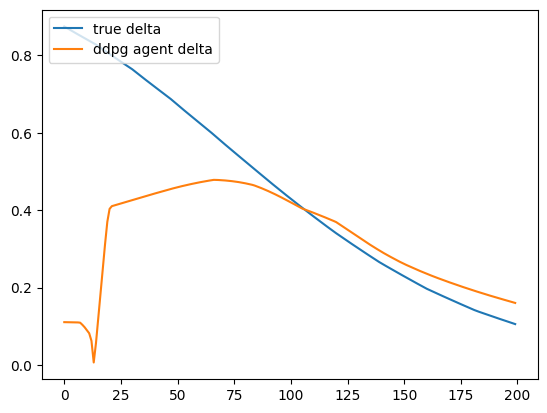

In [5]:
plt.plot(t_delta, label='true delta')
plt.plot(ddpg_agent_delta, label='ddpg agent delta')
plt.legend(loc='upper left')
plt.show()

Text(0.5, 1.0, '50 episodes test_reward vs episodes')

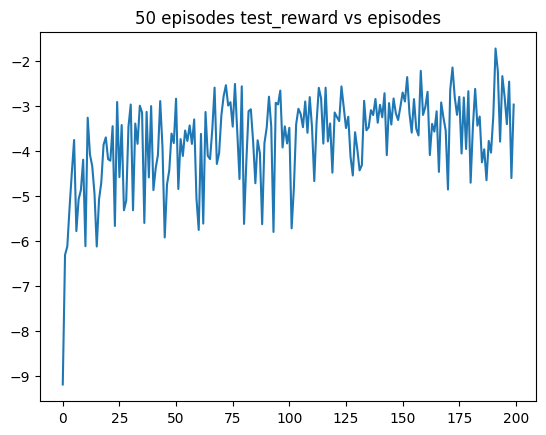

In [6]:
plt.plot(test_scores_ddpg)
plt.title('50 episodes test_reward vs episodes')